##### 1. WAFP to create a histogram of a given image.

In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

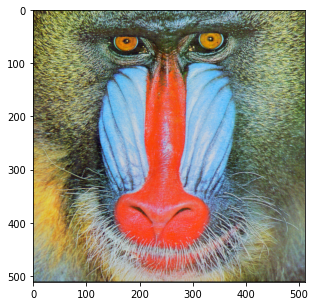

In [ ]:
baboon = np.array(Image.open('/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/baboon.png'))
plt.figure(figsize=(5,5))
plt.imshow(baboon )
plt.show()

In [ ]:
def plot_hist(image, normalized = False, title = "Image Histogram"):
    intensity_values = np.array([x for x in range(256)])

    histR = cv2.calcHist([image], [2], None, [256], [0,256])[:,0] / image.size if normalized else cv2.calcHist([image], [2], None, [256], [0,256])[:,0]
    histG = cv2.calcHist([image], [1], None, [256], [0,256])[:,0] / image.size if normalized else cv2.calcHist([image], [1], None, [256], [0,256])[:,0]
    histB = cv2.calcHist([image], [0], None, [256], [0,256])[:,0] / image.size if normalized else cv2.calcHist([image], [0], None, [256], [0,256])[:,0]
    
    plt.bar(intensity_values, histR, width = 1, color="#FF000099")
    plt.bar(intensity_values, histG, width = 1, color="#00FF0099")
    plt.bar(intensity_values, histB, width = 1, color="#0000FF99")
    plt.title(title)
    plt.xlabel('intensity')
    plt.legend(['Red', 'Green', 'Blue'])

    plt.show()

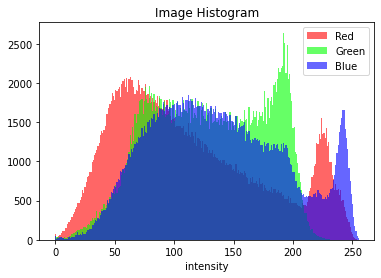

In [ ]:
plot_hist(baboon)

##### 2. WAFP to perform image segmentation using k-means clustering. You can use the sklearn library to perform the clustering.

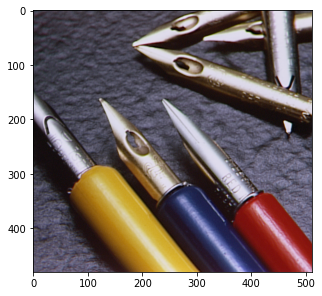

In [ ]:
pensImg = np.array(Image.open('/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/pens.bmp'))
plt.figure(figsize=(5,5))
plt.imshow(pensImg)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pens2d = pensImg.reshape(pensImg.shape[0] * pensImg.shape[1], pensImg.shape[2])
pens2d.shape

(245760, 3)

In [ ]:
dominantColors = 7
kmeans = KMeans(n_clusters=dominantColors)

In [ ]:
kmeans.fit(pens2d)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
centers = kmeans.cluster_centers_
print(centers)

[[ 65.09056744  62.3513369   76.25378788]
 [214.66192958 209.66145587 219.75311859]
 [ 99.8458112   95.710718   112.61929277]
 [ 37.08065416  24.19391658  23.33767579]
 [194.67117887 156.32849257  51.55881193]
 [130.91919774  50.94795689  23.75989856]
 [167.10957584 154.45790488 156.15269923]]


In [ ]:
centers = np.array(centers,dtype='uint8')
centers

array([[ 65,  62,  76],
       [214, 209, 219],
       [ 99,  95, 112],
       [ 37,  24,  23],
       [194, 156,  51],
       [130,  50,  23],
       [167, 154, 156]], dtype=uint8)

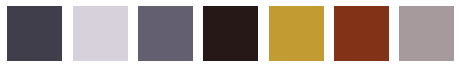

In [ ]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,7,i)
    plt.axis("off")
    i += 1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [ ]:
new_img = np.zeros((pensImg.shape[0] * pensImg.shape[1], pensImg.shape[2]), dtype='uint8')
print(new_img.shape)

(245760, 3)


In [ ]:
colors

[array([65, 62, 76], dtype=uint8),
 array([214, 209, 219], dtype=uint8),
 array([ 99,  95, 112], dtype=uint8),
 array([37, 24, 23], dtype=uint8),
 array([194, 156,  51], dtype=uint8),
 array([130,  50,  23], dtype=uint8),
 array([167, 154, 156], dtype=uint8)]

In [ ]:
kmeans.labels_[:]

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

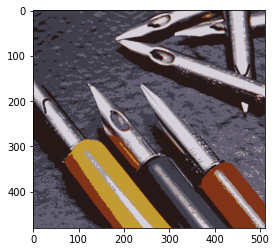

In [ ]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[kmeans.labels_[i]]
    
new_img = new_img.reshape((pensImg.shape))
plt.imshow(new_img)
plt.show()

##### 3. WAFP to perform image segmentation using Otsu's method.

In [ ]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

def plot_hist(old_image, new_image, normalized=False, title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])

    plt.subplot(1, 2, 1)
    hist1 = cv2.calcHist([old_image], [0], None, [256], [0,256])[:,0] / old_image.size if normalized else cv2.calcHist([old_image], [0], None, [256], [0,256])[:,0]
    plt.bar(intensity_values, hist1, width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')

    plt.subplot(1, 2, 2)
    hist2 = cv2.calcHist([new_image], [0], None, [256], [0,256])[:,0] / new_image.size if normalized else cv2.calcHist([new_image], [0], None, [256], [0,256])[:,0]
    plt.bar(intensity_values, hist2, width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

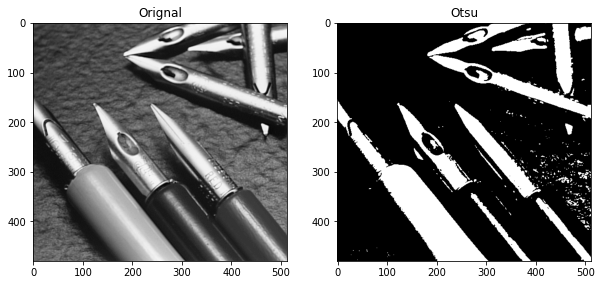

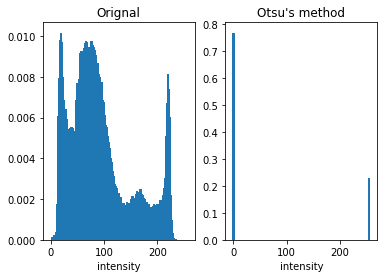

In [ ]:
pensCv2 = cv2.imread("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/pens.bmp", cv2.IMREAD_GRAYSCALE)
ret, otsu = cv2.threshold(pensCv2, 0, 255, cv2.THRESH_OTSU)
plot_image(pensCv2, otsu, "Orignal", "Otsu")
plot_hist(pensCv2, otsu, True, "Orignal", "Otsu's method")

##### 4. WAFP to create a negative image of a given image. You can use only the PIL library to open and manipulate the image.

In [ ]:
from PIL import Image, ImageOps

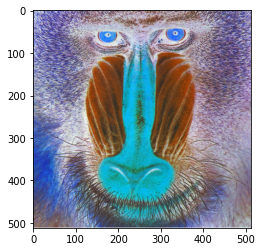

In [ ]:
baboon = Image.open('/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/baboon.png')
baboonInv = ImageOps.invert(baboon)
plt.imshow(baboonInv, cmap='gray')

##### 5. WAFP to apply a negative filter to a given image using NumPy.

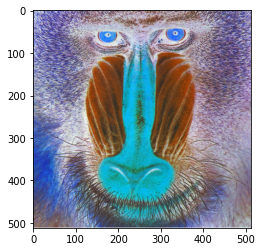

In [ ]:
baboonNp = np.array(baboon)
baboonNpInv = 255 - baboonNp
plt.imshow(baboonNpInv, cmap='gray')

##### 6. WAFP to apply a negative filter to a given image using OpenCV. You can use the cv2 library to load and display the images.

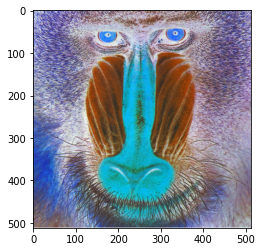

In [ ]:
babooncV2 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/baboon.png"), cv2.COLOR_BGR2RGB)
baboonCv2Inv = cv2.bitwise_not(babooncV2)
plt.imshow(baboonCv2Inv, cmap='gray')

##### 7. WAFP to adjust the brightness of an image. You can use the PIL library to open and manipulate the image.

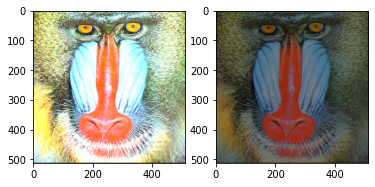

In [ ]:
from PIL import ImageEnhance

baboon = Image.open("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/baboon.png")
baboonB = ImageEnhance.Brightness(baboon)

baboonBright = baboonB.enhance(1.6)
baboonDark = baboonB.enhance(0.6)

plt.subplot(1, 2, 1)
plt.imshow(baboonBright, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(baboonDark, cmap="gray")

plt.show()

##### 8. WAFP to adjust the contrast of an image. You can use the PIL library to open and manipulate the image.

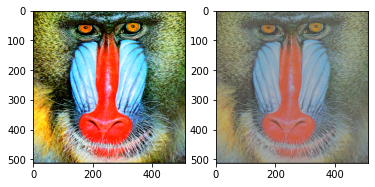

In [ ]:
baboonC = ImageEnhance.Contrast(baboon)

baboonHigh = baboonC.enhance(1.6)
baboonLow = baboonC.enhance(0.6)

plt.subplot(1, 2, 1)
plt.imshow(baboonHigh, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(baboonLow, cmap="gray")

plt.show()

##### 9. WAFP to adjust the brightness and contrast of an image. You can use the PIL library to open and manipulate the image.

In [ ]:
def enhance(image, bFactor = 1.0, cFactor = 1.0):
  imageB = ImageEnhance.Brightness(image)
  imageBrightness = imageB.enhance(bFactor)

  imageC = ImageEnhance.Contrast(imageBrightness)
  imageContrast = imageC.enhance(cFactor)

  plt.imshow(imageContrast, cmap="gray")
  plt.show()

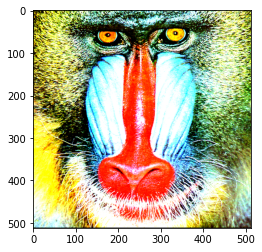

In [ ]:
enhance(baboon, 1.5, 2.0)

##### 10. WAFP to perform histogram equalization on a grayscale image.

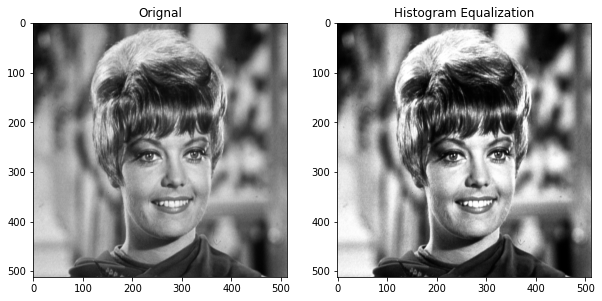

In [ ]:
zelda = cv2.imread("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/zelda.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

##### 11. WAFP to perform histogram equalization on a colour image.

In [1]:
def equHist1(img):
  img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
  return hist_eq

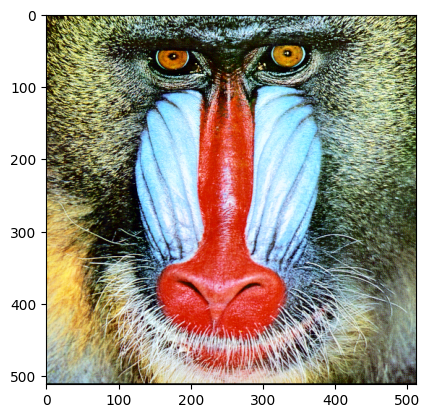

In [5]:
pen = cv2.imread("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/baboon.png")
image = cv2.cvtColor(pen, cv2.COLOR_BGR2RGB)
res_r  = equHist1(image)

plt.imshow(res_r.astype('uint8'))